The synthetic PCs are independent Markov processes with the same lag-1 autocorrelation, mean and standard deviation as the corresponding PC in the real data set. The significance of the clustering is reported as the percentage of times that the optimal variance ratio found by clustering the real data set exceeds the optimal variance ratio found by clustering the synthetic data sets. Large values of this significance indicate that the optimal variance ratio for the given partition is unlikely to have been found by chance in a data set whose pdf follows a multi-normal distribution

In [65]:
%load_ext autoreload
%autoreload 2

from sklearn import decomposition, cluster
import xarray as xr
import numpy as np
import os
from src.Enumerations import Season
from src.Experiments_infos import Data
from src.plot_funcs import plot_contourf_rotated_grid

from src.clustering.optimal_cluster_number import compute_synthetic_variance_ratios

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
year_start = 1984
year_end = 2015


exp = Data.ICON_CNRM_EXP

slp_nc = exp.slp_nc
lon_nc = exp.lon_nc
lat_nc = exp.lat_nc 
time_nc = exp.time_nc 

path_in = exp.slp_path
name_file_slp = exp.slp_aac_name  # Area selected,  29feb deleted, all months !!!!!!

season = Season.WINTER

DO_reduce_dim = True #reduce dimensionality before applying clustering
DO_cosine_cor = False     #DO cosine correction to data before applying clustering 
                      #and transorm back afterwards


if DO_reduce_dim:
    n_components = 4  #dimensionality of reduced phase space


In [91]:
slp_data_xr =xr.load_dataset(path_in+name_file_slp)
slp_data_xr_sel = slp_data_xr.sel(time=slp_data_xr.time.dt.month.isin(season.value)).PMSL.values
slp_data = np.reshape(slp_data_xr_sel,(slp_data_xr_sel.shape[0], slp_data_xr_sel.shape[1]*slp_data_xr_sel.shape[2]))

rlat = slp_data_xr.rlat.values
rlon = slp_data_xr.rlon.values
time_frame = slp_data_xr.time.values

In [92]:
lat = slp_data_xr.lat.values
lon = slp_data_xr.lon.values
time_frame = slp_data_xr.time.values

In [93]:
if DO_cosine_cor:
    slp_data =  cosine_cor(slp_data,rlat,rlon)
    
if DO_reduce_dim:
    pca = decomposition.PCA(n_components=n_components)
    pca.fit(slp_data)
    slp_data = pca.transform(slp_data)
    
slp_data.shape

(2798, 4)

In [96]:
ori =compute_synthetic_variance_ratios(slp_data, M=100,cluster_range=np.arange(10,20,1))   

/work/aa0238/a271093/Scripts/MOAAP/src/clustering/optimal_cluster_number.py:73: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"sample_{m}"] = np.nan


n_clusters=10
n_clusters=11
n_clusters=12
n_clusters=13
n_clusters=14
n_clusters=15
n_clusters=16
n_clusters=17
n_clusters=18
n_clusters=19


<Axes: xlabel='cluster_number'>

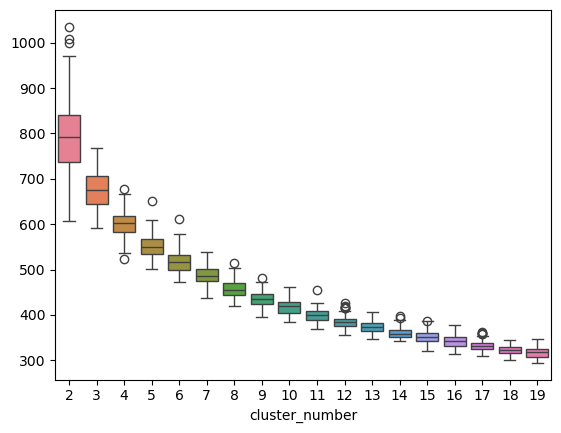

In [88]:
sns.boxplot(ori.transpose())

<Axes: xlabel='cluster_number'>

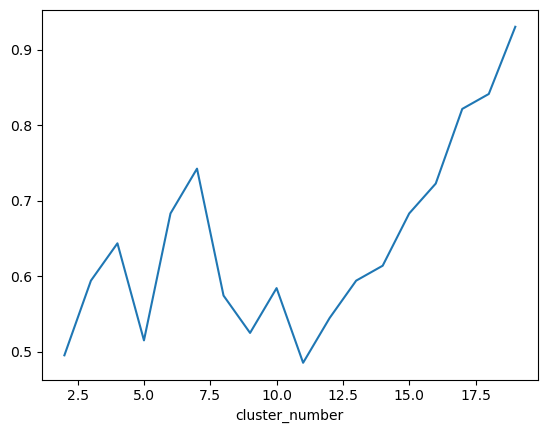

In [89]:
dd=ori.apply(lambda row: row> row["original_time_series"],axis=1).astype(int)
(dd.sum(axis=1)/dd.shape[1]).plot()


<Axes: xlabel='cluster_number'>

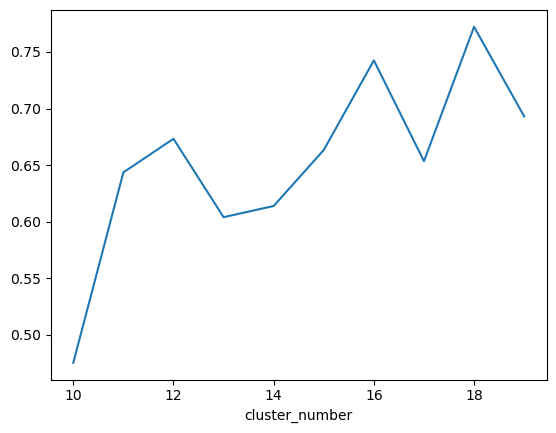

In [97]:
dd=ori.apply(lambda row: row> row["original_time_series"],axis=1).astype(int)
(dd.sum(axis=1)/dd.shape[1]).plot()

In [55]:
ori

,original_time_series,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,...,sample_190,sample_191,sample_192,sample_193,sample_194,sample_195,sample_196,sample_197,sample_198,sample_199
cluster_number,,,,,,,,,,,,,,,,,,,,,
2,487.873613,482.659406,451.173745,432.433521,523.878690,490.568001,453.649089,540.714461,467.437751,526.549548,...,494.471990,477.530598,499.433718,504.833837,491.141507,598.331407,529.303586,629.223596,474.680631,488.166085
3,386.373373,356.268916,424.044050,429.788738,368.196376,439.583176,410.847933,345.145730,393.931627,366.021924,...,348.956734,374.593955,398.974256,391.184183,334.741338,381.017861,405.712600,365.672624,411.333932,444.679327
4,312.046118,311.534821,299.944427,315.994656,345.352554,343.125782,321.537292,314.864607,328.535548,325.988070,...,316.282057,320.700502,358.636927,306.015510,353.341077,325.719379,333.581458,324.952284,327.404317,324.319576
5,280.064999,283.334632,289.533531,285.378447,318.918804,293.609526,308.784941,325.027821,316.742967,283.067670,...,289.246057,289.324501,292.918274,305.081264,269.956043,266.325747,345.038001,287.141084,303.532653,302.397525
6,262.584908,274.244138,261.078312,297.161772,249.830779,258.779825,254.779999,297.559262,264.911067,256.519396,...,253.338915,259.946495,264.977838,258.236259,253.086611,290.560268,241.204243,252.260070,258.235525,274.457470
7,240.019364,221.402238,240.747051,222.732849,227.859970,246.532998,236.058950,241.425283,270.250763,232.213938,...,261.240311,247.344896,240.032974,252.770173,238.274238,250.815843,256.984517,258.392877,243.116487,248.371764
8,223.744187,226.261522,218.103659,222.665575,210.075971,218.745110,229.880276,236.977593,236.533923,247.369260,...,228.075919,224.410541,232.803443,210.876532,208.449466,215.760295,228.377999,227.601978,224.150359,214.806183
9,206.691493,218.481945,190.546889,217.187623,214.800592,202.156750,210.955145,207.673648,221.614289,215.231806,...,205.240952,203.225654,211.327147,224.337211,219.012947,200.601702,194.907910,212.843466,194.104386,221.081419


In [46]:
from src.clustering.optimal_cluster_number import create_AR1_timeseries,get_lag_autocorrelation

slp_data.shape
    
a= create_AR1_timeseries(slp_data)   

In [47]:
np.mean(a,axis=0)
get_lag_autocorrelation(a)

[0.941332595246738,
 0.8840968691842038,
 0.8887365963427988,
 0.8898804703828646,
 0.8490820615948967,
 0.8592351954557358,
 0.8148270930401912,
 0.7801153998460605,
 0.7901895515309074,
 0.7643973750058228,
 0.681229937850779,
 0.6984692899598944,
 0.6647325122888977,
 0.6849789540907835,
 0.6727240531988472,
 0.5744670922339808,
 0.5375652436687782,
 0.600485301265679,
 0.579214619687079,
 0.5562706954556469,
 0.4848589523724862,
 0.5367438771411273,
 0.44547369969393286,
 0.5286392574981613,
 0.5538556324265551,
 0.5020610984583576,
 0.39870753557353766,
 0.3360915370158288,
 0.5559603143484508,
 0.4591705093101562]

In [48]:
np.mean(slp_data,axis=0)
get_lag_autocorrelation(slp_data)

[0.9419418321320105,
 0.8911925190714339,
 0.8929956958364829,
 0.879917703388299,
 0.8606236338186997,
 0.8478494559692936,
 0.8163697174580749,
 0.786615240866229,
 0.7970551133813408,
 0.7592338996034377,
 0.7120846167463925,
 0.678796300040255,
 0.6715506006514257,
 0.6902455016462565,
 0.6860502263703059,
 0.56981939865743,
 0.5586958319389967,
 0.6083871630259862,
 0.5741375139566997,
 0.5578648027973564,
 0.4889414273297127,
 0.5424126001826387,
 0.4897923303602639,
 0.532040068987368,
 0.5400337635294568,
 0.531151732539017,
 0.4084263280718542,
 0.3253340264061062,
 0.5096596963322446,
 0.4505849536392292]

In [8]:
var= np.var(slp_data,axis=0)
mean= np.mean(slp_data,axis=0)
lag1 = get_lag1_autocorrelation(slp_data)
#var_noise = (1-np.power(lag1,2))*var
print (f"{mean=}")
print (f"{var=}")
print (f"{lag1=}")

mean=array([-5.70064112e-05, -1.95058183e-05, -1.15458170e-05,  2.15488017e-05,
        9.76562478e-06,  1.72932948e-06, -1.60379545e-06,  2.81333911e-07,
        9.32481541e-08,  6.47968727e-06, -4.91672097e-07,  5.14984151e-07,
        9.66389962e-07, -1.35633684e-07, -1.40613975e-06,  4.70479335e-07,
       -7.98172437e-07,  1.58415901e-06,  2.03238596e-06,  7.52343041e-08,
       -1.92854145e-07,  3.28487815e-08, -1.29275847e-07,  2.25173108e-06,
        5.71939665e-07,  5.15513932e-07, -1.92430275e-06,  4.86903730e-07,
        7.82012933e-07,  9.00692385e-07,  6.14590135e-07,  1.02784895e-07,
        7.01480417e-07,  6.78168419e-08,  3.12487282e-06, -4.75777512e-07,
        2.78684837e-07,  1.93648862e-06, -8.63605081e-08, -5.93397367e-08,
        1.93383954e-07, -2.78154999e-07,  3.45442032e-07,  4.27034166e-07,
        3.45574477e-07, -8.54068333e-07, -9.00692385e-07,  7.13136444e-07,
        9.38839378e-07, -1.50468608e-07], dtype=float32)
var=array([280046.62  , 181840.42  , 1

In [9]:
t=create_AR1_timeseries(slp_data)

In [10]:
var= np.var(t,axis=0)
mean= np.mean(t,axis=0)
lag1 = get_lag1_autocorrelation(t)
#var_noise = (1-np.power(lag1,2))*var
print (f"{mean=}")
print (f"{var=}")
print (f"{lag1=}")

mean=array([ 20.55218995,  15.30073514,  26.4907603 , -23.18363969,
        11.49445216,  -4.43493228,  -9.38327502,  -5.55639221,
        -0.69901319,  -4.37801026,  -3.62132408,   0.47161413,
         1.64581984,  -2.41693621,  -0.56921212,  -0.81320463,
         3.65193387,   0.98012143,  -2.89794364,  -3.90374144,
        -1.01867759,  -0.56370995,  -0.22164435,   0.38477605,
        -0.07532188,  -0.45619352,  -0.05551059,  -0.16185449,
        -1.74655209,   1.95001769,   0.5578377 ,   0.93118265,
         2.15437   ,   0.25286561,   0.80877034,   1.17314712,
        -2.60064663,  -1.3161376 ,  -0.98786239,  -1.19004272,
         0.14076587,  -0.16709113,   0.14347715,  -0.67133922,
         0.90322458,  -1.04488654,   0.04942451,  -0.6552906 ,
         0.28098068,  -0.66915863])
var=array([276246.33328205, 210677.59076731, 134744.95611252,  94581.97583972,
        81759.92629203,  54969.10279462,  38023.13392897,  38857.99783271,
        30919.06868455,  25166.9254667 ,  25489.1

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
def optimal_cluster_number(time_series: np.ndarray, M: int, cluster_range) -> None:
    
    df = pd.DataFrame(index= cluster_range)
    df.index.name = "cluster_number"
    df["original_time_series"]=np.nan
    for m in range(M):
        df[f"sample_{m}"]=np.nan


    
    synthetic_var_ratio = np.empty((len(cluster_range),M))
    original_var_ratio = np.empty(len(cluster_range))
    
    for n, n_clusters in enumerate(cluster_range):
        print (f"{n_clusters=}")
        original_kmeans = KMeans(n_clusters=n_clusters).fit(time_series)
        df.loc[n_clusters,"original_time_series"] = calinski_harabasz_score(time_series, original_kmeans.labels_)# original_kmeans.inertia_        

        
        for m in range(M):
            synthetic_time_series = create_AR1_timeseries(time_series)


            kmeans = KMeans(n_clusters=n_clusters).fit(synthetic_time_series)
            df.loc[n_clusters,f"sample_{m}"] = calinski_harabasz_score(synthetic_time_series, kmeans.labels_)# kmeans.inertia_       
            
    return df

In [17]:
ori =optimal_cluster_number(slp_data, M=100,cluster_range=[2,3,4,5,6,7,8,9,10,11,12])   

/tmp/ipykernel_1870567/3210368877.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"sample_{m}"]=np.nan


n_clusters=2
n_clusters=3
n_clusters=4
n_clusters=5
n_clusters=6
n_clusters=7
n_clusters=8
n_clusters=9
n_clusters=10
n_clusters=11
n_clusters=12


In [13]:
ori

,original_time_series,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,...,sample_10,sample_11,sample_12,sample_13,sample_14,sample_15,sample_16,sample_17,sample_18,sample_19
cluster_number,,,,,,,,,,,,,,,,,,,,,
2,642.107202,587.631228,647.097146,689.845972,775.868468,663.441729,614.461823,679.733669,776.925187,684.882058,...,602.464636,692.827310,640.639379,652.085197,656.959965,654.451713,642.616785,664.410022,659.991181,665.699787
3,516.392549,497.025132,478.605514,502.948693,539.017296,531.027579,472.912385,485.220776,522.484327,517.386659,...,476.121812,478.599896,515.208115,554.414476,522.608999,474.163041,531.935146,512.737885,478.876776,472.112352
4,428.959535,431.907557,419.024311,412.109274,410.575672,399.298127,427.686577,395.323074,424.856357,453.094685,...,426.445925,422.009563,429.804696,429.684521,410.783320,444.942964,459.892534,413.311740,485.325457,429.905003
5,385.463535,335.687944,380.834697,397.132727,393.804035,386.774662,371.427455,395.384328,367.547825,366.649334,...,384.232544,382.920800,416.689869,388.354456,391.547098,368.932047,373.873299,356.672152,371.552897,362.093847
6,342.923829,339.879929,335.774546,332.454963,334.367075,346.161082,326.704810,331.995909,334.758990,322.211316,...,332.066069,335.509183,320.899276,326.320998,336.872600,337.578094,337.667005,345.669693,349.186933,351.034013
7,309.441899,305.729616,313.237263,299.328896,299.050114,290.630096,296.287987,298.709358,313.107478,296.711822,...,294.166455,315.457379,305.854015,291.429510,304.601989,304.988672,296.871460,309.614323,298.191650,315.652223
8,287.494748,265.930247,273.222096,282.801520,290.791078,284.002895,278.498729,274.472733,295.218956,271.191113,...,272.403774,273.916040,291.815965,278.243028,277.396826,262.182884,271.936244,273.381511,281.114341,265.144396
9,266.451769,253.843807,246.442504,247.901888,243.497807,265.887958,260.476155,274.163899,243.955762,264.574274,...,246.949996,254.548350,255.836762,264.510766,261.725194,255.121361,263.953741,271.924643,270.862407,250.272978
10,248.066606,256.999835,247.486986,224.346154,249.706268,237.018381,232.749555,255.508795,234.350742,230.061175,...,241.392490,233.017584,236.456066,222.409615,251.226899,253.719839,248.260007,249.226072,243.878878,233.703800


<Axes: xlabel='cluster_number'>

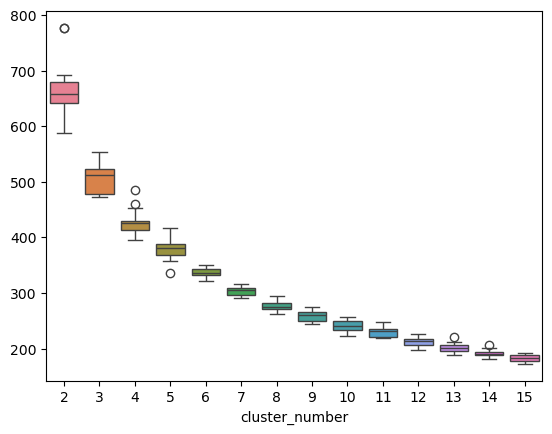

In [14]:
import seaborn as sns
sns.boxplot(ori.transpose())

In [16]:
dd=ori.apply(lambda row: row> row["original_time_series"],axis=1).astype(int)
dd.sum(axis=1)/dd.shape[1]

cluster_number
2     0.714286
3     0.333333
4     0.380952
5     0.333333
6     0.190476
7     0.285714
8     0.142857
9     0.190476
10    0.333333
11    0.333333
12    0.095238
13    0.095238
14    0.095238
15    0.142857
dtype: float64

In [152]:
dd.shape

(9, 101)

In [107]:
df = pd.DataFrame( index=[2,3,4,5,6])
df["original_time_series"]=np.nan
df["original_time_series"].iloc[2] = 3
df
df.loc[6,"original_time_series"] =9
df

/tmp/ipykernel_1472251/3699235456.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["original_time_series"].iloc[2] = 3


,original_time_series
2,NaN
3,NaN
4,3.0
5,NaN
6,9.0


In [102]:
import seaborn as sns
sns.boxplot(

In [45]:
            


    for n_clusters, original_inertia in zip(cluster_range, original_inertias):
        smaller_variances = 0
        for _ in range(M):
            synthetic_data = np.random.multivariate_normal(np.mean(X, axis=0), np.cov(X, rowvar=False), len(X))
          
            if synthetic_inertia < original_inertia:
                smaller_variances += 1
        smaller_variances_counts.append(smaller_variances / M * 100)

    plt.plot(cluster_range, smaller_variances_counts)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Percentage of Synthetic Time Series with Lower Inertia')
    plt.title('Optimal Number of Clusters')
    plt.show()

(3600, 20)

In [20]:
for i range(x.shape[0]):
    x[i+1,:] = mean+lag1*(x[i,:]-mean) + noise

(3600,)

In [26]:
np.random.normal(mean, var)

array([ 47985.62750108,  26021.74974923, -18164.06099064, ...,
        -6356.83478643,  46227.34571761,  62390.11570613])

In [155]:
#####################
#######          ####
###### KMeans    ####
#####################


means = cluster.KMeans(n_clusters=num_cluster,
                n_init=num_iter,
                max_iter=900 ,
                random_state = random_state,
                algorithm='lloyd').fit(slp_data)
cluster_centers = means.cluster_centers_
plot_len = num_cluster
BMU = means.labels_
    

In [156]:
if DO_reduce_dim:
    cluster_centers = pca.inverse_transform(cluster_centers)

In [157]:
if DO_cosine_cor:
    cluster_centers = inv_cosine_cor(cluster_centers,lat,lon)
    

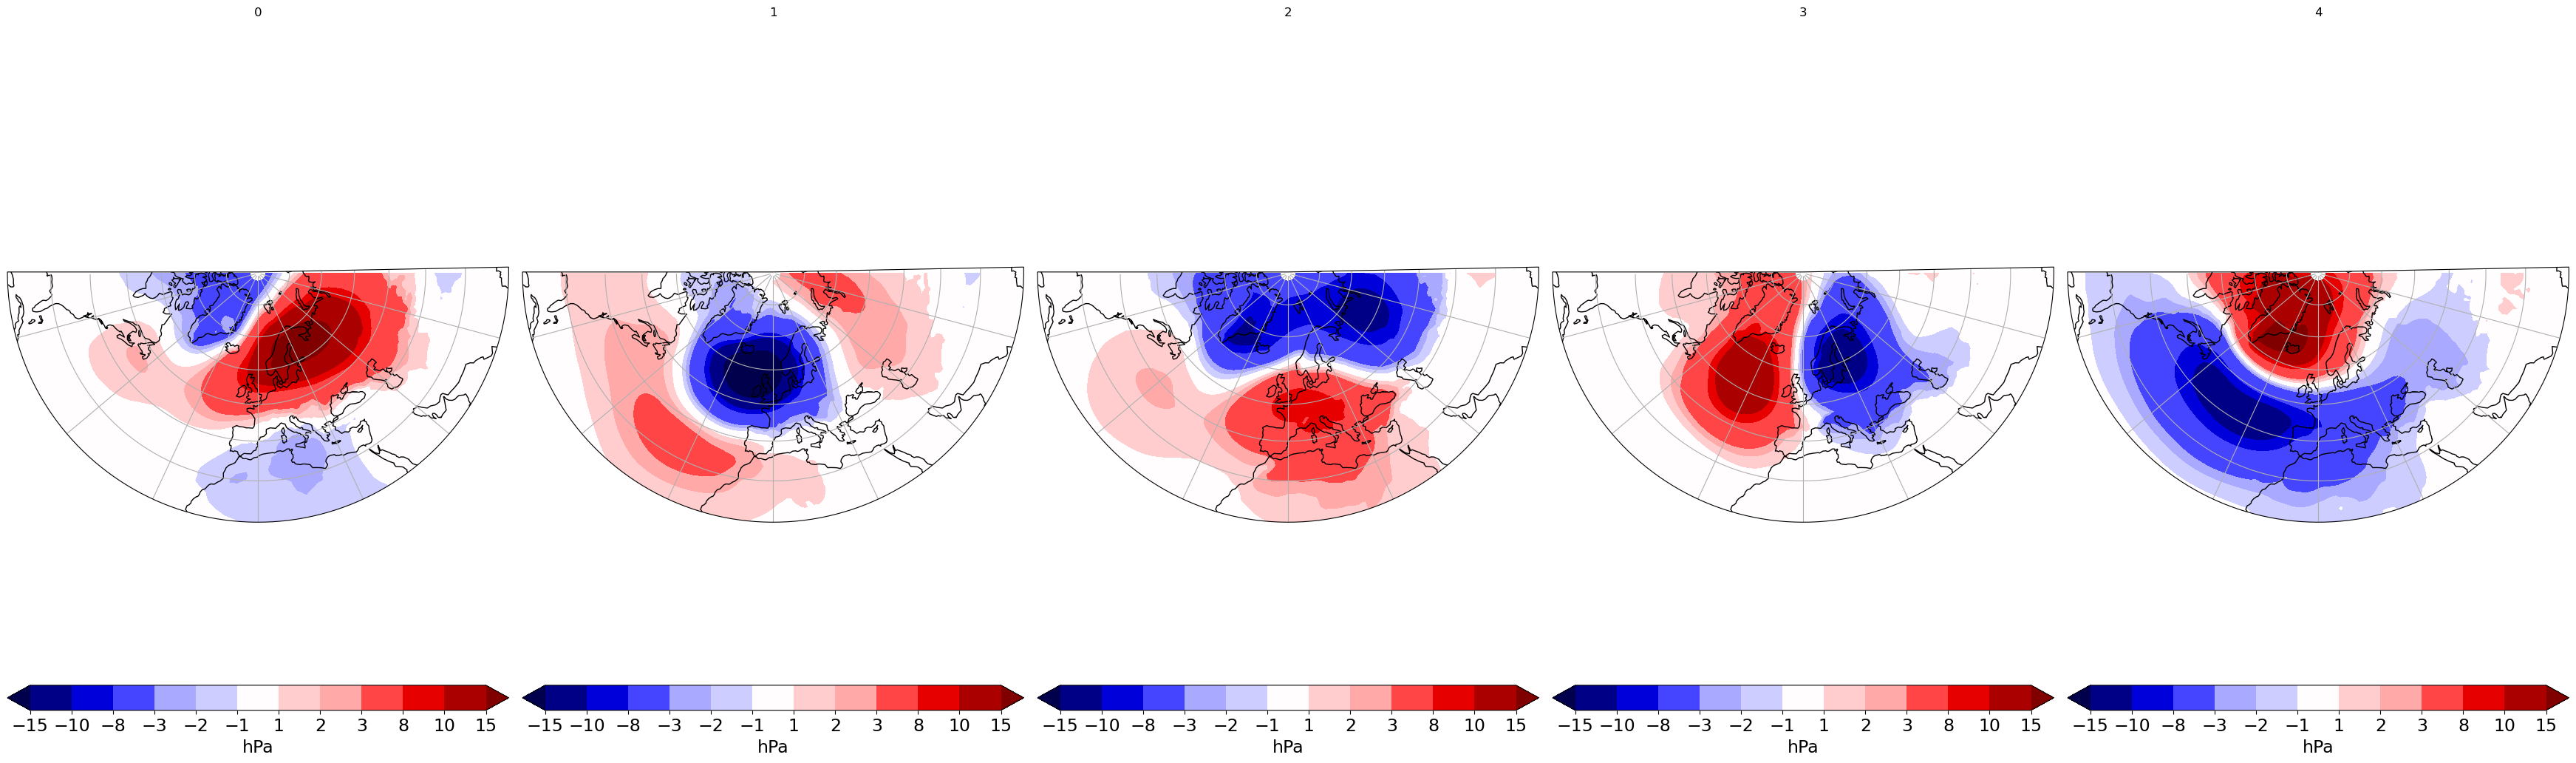

In [158]:


    
plot_dat = cluster_centers.reshape(-1,lat.size,lon.size)
cluster_names = np.arange(5)

fig_cluster = plot_cluster(plot_dat,lat,lon,
                            plot_size=(35, 15),
                            plot_shape=[1,5],
                            cbar_size=1,
                            cbar_ticks=[-15, -10, -8, -3, -2,-1,1, 2, 3, 8, 10, 15],
                            font_size=17,
                            unit='hPa',
                            color_lev = [-15, -10, -8, -3, -2,-1,1, 2, 3, 8, 10, 15],
                            titles =np.arange(5))


In [88]:
cluster_centers

array([[ 9.67103   ,  9.690021  ,  9.708751  , ...,  0.1338753 ,
         0.1158597 ,  0.09717723],
       [ 0.75498253,  0.74455583,  0.7344203 , ..., -0.23030935,
        -0.22048874, -0.21264502],
       [ 3.2873585 ,  3.2942374 ,  3.3011014 , ..., -0.13666174,
        -0.13249813, -0.12473302],
       [-5.309883  , -5.3067713 , -5.3037257 , ..., -0.23549578,
        -0.24949758, -0.27072904],
       [-5.8893204 , -5.903964  , -5.918561  , ...,  0.42337236,
         0.43983755,  0.46280068]], dtype=float32)

In [90]:
cluster_dic= {3:"SCAN" , 4 : "NAO+" , 0 : "NAO-", 1 : "ATL-", 2 : "DIP"}
cluster_names = list(cluster_dic.keys())
BMU_bak = np.copy(BMU)
BMU[BMU_bak==cluster_names[0]] = 0
BMU[BMU_bak==cluster_names[1]] = 1
BMU[BMU_bak==cluster_names[2]] =2
BMU[BMU_bak==cluster_names[3]] = 3
BMU[BMU_bak==cluster_names[4]] = 4

In [92]:
BMU

array([4, 4, 4, ..., 4, 4, 4], dtype=int32)

In [115]:
list(cluster_dic.values())

['SCAN', 'NAO+', 'NAO-', 'ATL-', 'DIP']

In [117]:
BMU_df = pd.DataFrame(BMU, index=time_frame)
BMU_df.columns=["cluster_id"]

BMU_df["cluster_name"] = BMU_df.apply(lambda row: list(cluster_dic.values())[row.cluster_id], axis=1)


In [118]:
BMU_df.to_csv()

,cluster_id,cluster_name
1979-01-01,4,DIP
1979-01-02,4,DIP
1979-01-03,4,DIP
1979-01-04,4,DIP
1979-01-05,1,NAO+
...,...,...
2018-12-27,4,DIP
2018-12-28,4,DIP
2018-12-29,4,DIP
2018-12-30,4,DIP


In [102]:
apply(lambda row: row.a + row.b, axis=1)

,cluster_id
1979-01-01,4
1979-01-02,4
1979-01-03,4
1979-01-04,4
1979-01-05,1
...,...
2018-12-27,4
2018-12-28,4
2018-12-29,4
2018-12-30,4


In [2]:
print ("Hello")

Hello


In [1]:
a=4
a

4

In [1]:
!hostname

levante2.lvt.dkrz.de
